North Atlantic Oscillation (NAO) Indices between 1948-1-01 to 2014-12-01

In [108]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

import matplotlib.pyplot as plt

path='/home/pdirmeye/classes/clim680_2022/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'

print(start_date)

1948-1-01


In [109]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [110]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [111]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

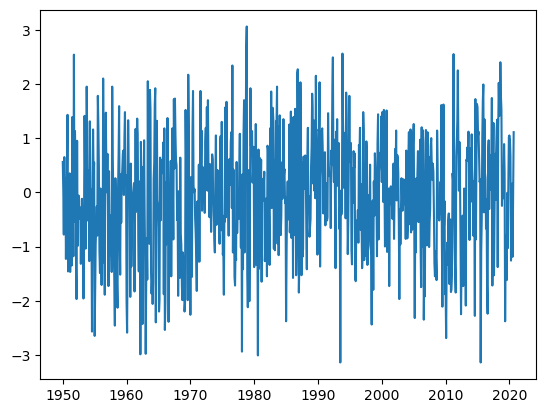

In [112]:
plt.plot(ds_index['time'],ds_index['nao'])

In [113]:
# Define the NAO phases (e.g., positive, neutral, negative)
nao_positive = ds_index.where(ds_index['nao'] >= 1.0, drop=True)
nao_neutral = ds_index.where((ds_index['nao'] >= -1.0) & (ds_index['nao'] <= 1.0), drop=True)
nao_negative = ds_index.where(ds_index['nao'] <= -1.0, drop=True)

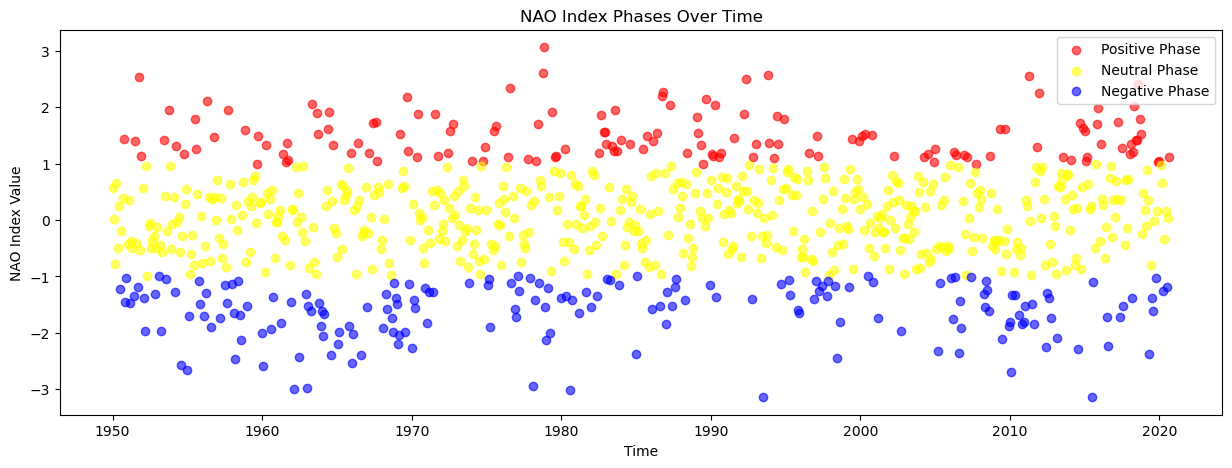

In [114]:
# Assuming ds_index has a 'time' coordinate and 'nao' variable
time = ds_index['time'].values
nao_values = ds_index['nao'].values

# Convert the 'time' coordinate to numpy.datetime64 if it's not already
time = np.array(time).astype('datetime64[ms]')

# Ensure that nao_values is a floating point array
nao_values = np.array(nao_values).astype(float)

# Define the boolean masks for the NAO phases
nao_positive_phase = nao_values >= 1.0
nao_neutral_phase = (nao_values > -1.0) & (nao_values < 1.0)
nao_negative_phase = nao_values <= -1.0

# Create the plot
plt.figure(figsize=(15, 5))

# Plot each phase using a different color
plt.scatter(time[nao_positive_phase], nao_values[nao_positive_phase], color='red', label='Positive Phase', alpha=0.6)
plt.scatter(time[nao_neutral_phase], nao_values[nao_neutral_phase], color='yellow', label='Neutral Phase', alpha=0.6)
plt.scatter(time[nao_negative_phase], nao_values[nao_negative_phase], color='blue', label='Negative Phase', alpha=0.6)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('NAO Index Value')
plt.title('NAO Index Phases Over Time')
plt.legend()

# Show the plot
plt.show()

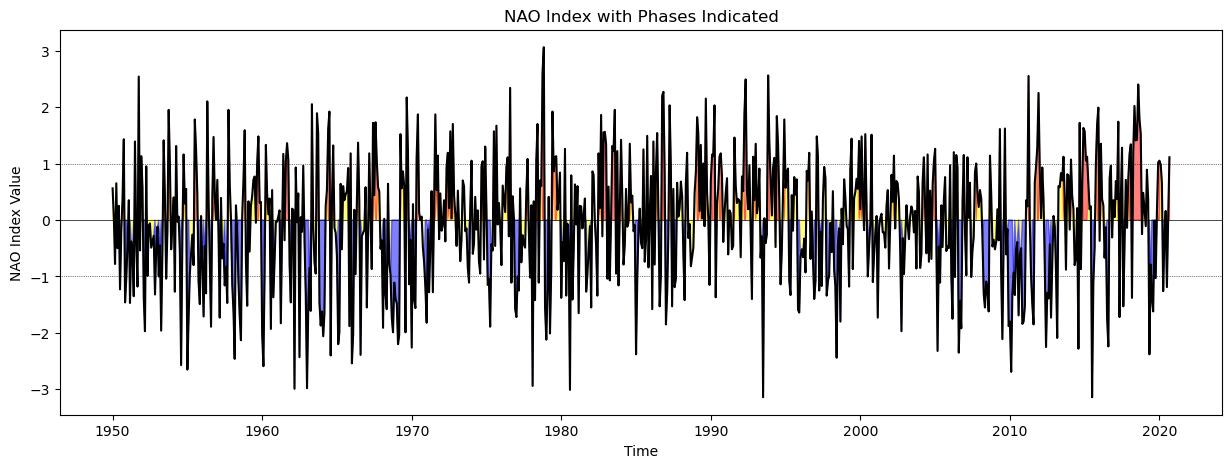

In [115]:
# Assuming ds_index has a 'time' coordinate and 'nao' variable
time = ds_index['time'].values
nao_values = ds_index['nao'].values

# Convert the 'time' coordinate to numpy.datetime64 if it's not already
time = np.array(time).astype('datetime64[ms]')

# Ensure that nao_values is a floating point array
nao_values = np.array(nao_values).astype(float)

# Create the plot
plt.figure(figsize=(15, 5))

# Plot the NAO index as a black line
plt.plot(time, nao_values, 'k')

# Fill between the NAO index and 0 where the NAO index is positive (above 1.0)
plt.fill_between(time, nao_values, where=(nao_values >= 1.0), color='red', alpha=0.5, interpolate=True)

# Fill between the NAO index and 0 where the NAO index is neutral (between -1.0 and 1.0)
plt.fill_between(time, nao_values, where=((nao_values > -1.0) & (nao_values < 1.0)), color='yellow', alpha=0.5, interpolate=True)

# Fill between the NAO index and 0 where the NAO index is negative (below -1.0)
plt.fill_between(time, nao_values, where=(nao_values <= -1.0), color='blue', alpha=0.5, interpolate=True)

# Horizontal line at 0
plt.axhline(0, color='black', linewidth=0.5)

# Dotted horizontal lines at 1.0 and -1.0 thresholds
plt.axhline(1, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')


# Adding labels and title
plt.xlabel('Time')
plt.ylabel('NAO Index Value')
plt.title('NAO Index with Phases Indicated')

# Show the plot
plt.show()

In [116]:
# Define the NAO phases (e.g., positive, neutral, negative)
nao_positive = ds_index.where(ds_index['nao'] >= 1.0, drop=True)
nao_neutral = ds_index.where((ds_index['nao'] >= -1.0) & (ds_index['nao'] <= 1.0), drop=True)
nao_negative = ds_index.where(ds_index['nao'] <= -1.0, drop=True)

# Make the timesteps same as ds_anom
nao_positive['time'] = nao_positive['time'].values.astype('datetime64[M]')
nao_negative['time'] = nao_negative['time'].values.astype('datetime64[M]')
nao_neutral['time'] = nao_neutral['time'].values.astype('datetime64[M]')

# Print the counts
print(f'NAO Positive Timesteps: {len(nao_positive.time)}')
print(f'NAO Neutral Timesteps: {len(nao_neutral.time)}')
print(f'NAO Negative Timesteps: {len(nao_negative.time)}')


NAO Positive Timesteps: 147
NAO Neutral Timesteps: 528
NAO Negative Timesteps: 181


In [117]:
ds_climo = precipitation.groupby('time.month').mean()
ds_anoms = precipitation.groupby('time.month')-ds_climo
ds_anoms


<xarray.DataArray 'pr' (time: 1980, lat: 64, lon: 128)>
array([[[-1.6124311e-06, -1.4587363e-06, -1.2998195e-06, ...,
         -1.8195121e-06, -1.7920810e-06, -1.7404620e-06],
        [-9.4375810e-07, -6.2775428e-07, -3.1272816e-07, ...,
         -2.1022247e-06, -1.9776871e-06, -1.6285222e-06],
        [ 1.4205011e-07,  1.2436419e-07,  2.1633196e-07, ...,
         -7.0209830e-07, -2.2738209e-07,  6.6700068e-09],
        ...,
        [ 3.0283009e-06,  1.4200377e-06,  1.1943876e-06, ...,
          2.2020458e-06,  3.5951734e-06,  3.3212873e-06],
        [ 3.4815457e-08,  1.2854257e-06,  2.3925732e-06, ...,
         -2.7575179e-06, -1.8954015e-06, -1.0269791e-06],
        [-2.3292703e-06, -2.0961684e-06, -1.9612507e-06, ...,
         -2.0082523e-06, -2.0020359e-06, -2.3785540e-06]],

       [[-9.0291115e-07, -9.2763031e-07, -9.8425176e-07, ...,
         -7.6815712e-07, -7.9909779e-07, -8.6263333e-07],
        [ 1.2619987e-06,  1.7288337e-06,  2.0918810e-06, ...,
          3.8883559e-07,  5.7427701e-07,  8.9716309e-07],
        [ 1.0723295e-06,  1.2604464e-06,  1.4046320e-06, ...,
          8.4202725e-07,  8.2562246e-07,  9.7088878e-07],
...
        [-2.6470934e-07, -6.6958637e-07, -5.3610802e-07, ...,
         -3.0444608e-06, -1.6727145e-06, -7.0665556e-07],
        [ 1.8942046e-07,  1.5937621e-07,  3.8981216e-07, ...,
         -1.4764887e-06, -5.8638307e-07,  2.1647793e-08],
        [-2.9671064e-06, -3.0254291e-06, -3.1231632e-06, ...,
         -2.6213340e-06, -2.8189197e-06, -2.9707355e-06]],

       [[-1.2290792e-06, -1.1284070e-06, -1.0288164e-06, ...,
         -1.3204517e-06, -1.2994146e-06, -1.2544036e-06],
        [-1.7814244e-06, -1.5067949e-06, -1.3606157e-06, ...,
         -2.4189285e-06, -2.2793420e-06, -2.0399530e-06],
        [-7.8051278e-07, -6.8947463e-07, -4.3300952e-07, ...,
         -8.9599189e-07, -8.5011789e-07, -8.5640568e-07],
        ...,
        [-8.4641488e-07, -5.4597695e-07, -1.1793272e-06, ...,
         -7.7660025e-07, -8.7221269e-07, -2.8871182e-07],
        [ 1.6836784e-06,  1.6401164e-06,  2.3093226e-06, ...,
          2.2883960e-06,  2.4783531e-06,  2.7848009e-06],
        [ 2.1439364e-06,  2.1118335e-06,  1.9783483e-06, ...,
          1.1132215e-06,  1.7203183e-06,  1.8679066e-06]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [118]:

import xarray as xr

# Define the URL of the NetCDF dataset
url = "http://crd-esgf-drc.ec.gc.ca/thredds/dodsC/esgC_dataroot/AR6/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc"

# Open the dataset using xarray
ds = xr.open_dataset(url)

# Print the dataset information
print(ds)

# Access the 'pr' (precipitation) variable
precipitation = ds['pr']

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/54)
    CCCma_model_hash:                3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:              rc3-pictrl
    CCCma_pycmor_hash:               33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                     rc3.1-his01
    Conventions:                     CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:       1850:01:01:00
    ...                              ...
    variable_id:                     pr
    variant_l

In [119]:
# Resample the daily data to monthly averages

ds_anom_monthly = ds_anoms.resample(time='M').mean()
ds_anom_monthly['time']= ds_anom_monthly['time'].values.astype('datetime64[M]')
ds_anom_monthly

<xarray.DataArray 'pr' (time: 1980, lat: 64, lon: 128)>
array([[[-1.6124311e-06, -1.4587363e-06, -1.2998195e-06, ...,
         -1.8195121e-06, -1.7920810e-06, -1.7404620e-06],
        [-9.4375810e-07, -6.2775428e-07, -3.1272816e-07, ...,
         -2.1022247e-06, -1.9776871e-06, -1.6285222e-06],
        [ 1.4205011e-07,  1.2436419e-07,  2.1633196e-07, ...,
         -7.0209830e-07, -2.2738209e-07,  6.6700068e-09],
        ...,
        [ 3.0283009e-06,  1.4200377e-06,  1.1943876e-06, ...,
          2.2020458e-06,  3.5951734e-06,  3.3212873e-06],
        [ 3.4815457e-08,  1.2854257e-06,  2.3925732e-06, ...,
         -2.7575179e-06, -1.8954015e-06, -1.0269791e-06],
        [-2.3292703e-06, -2.0961684e-06, -1.9612507e-06, ...,
         -2.0082523e-06, -2.0020359e-06, -2.3785540e-06]],

       [[-9.0291115e-07, -9.2763031e-07, -9.8425176e-07, ...,
         -7.6815712e-07, -7.9909779e-07, -8.6263333e-07],
        [ 1.2619987e-06,  1.7288337e-06,  2.0918810e-06, ...,
          3.8883559e-07,  5.7427701e-07,  8.9716309e-07],
        [ 1.0723295e-06,  1.2604464e-06,  1.4046320e-06, ...,
          8.4202725e-07,  8.2562246e-07,  9.7088878e-07],
...
        [-2.6470934e-07, -6.6958637e-07, -5.3610802e-07, ...,
         -3.0444608e-06, -1.6727145e-06, -7.0665556e-07],
        [ 1.8942046e-07,  1.5937621e-07,  3.8981216e-07, ...,
         -1.4764887e-06, -5.8638307e-07,  2.1647793e-08],
        [-2.9671064e-06, -3.0254291e-06, -3.1231632e-06, ...,
         -2.6213340e-06, -2.8189197e-06, -2.9707355e-06]],

       [[-1.2290792e-06, -1.1284070e-06, -1.0288164e-06, ...,
         -1.3204517e-06, -1.2994146e-06, -1.2544036e-06],
        [-1.7814244e-06, -1.5067949e-06, -1.3606157e-06, ...,
         -2.4189285e-06, -2.2793420e-06, -2.0399530e-06],
        [-7.8051278e-07, -6.8947463e-07, -4.3300952e-07, ...,
         -8.9599189e-07, -8.5011789e-07, -8.5640568e-07],
        ...,
        [-8.4641488e-07, -5.4597695e-07, -1.1793272e-06, ...,
         -7.7660025e-07, -8.7221269e-07, -2.8871182e-07],
        [ 1.6836784e-06,  1.6401164e-06,  2.3093226e-06, ...,
          2.2883960e-06,  2.4783531e-06,  2.7848009e-06],
        [ 2.1439364e-06,  2.1118335e-06,  1.9783483e-06, ...,
          1.1132215e-06,  1.7203183e-06,  1.8679066e-06]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [120]:

# Define the time range for the overlapping period


start_date = '1950-01-01'
end_date = '2014-12-01'

      # Selection of the overlapping time period for both NAO phases and precipitation data
    
nao_positive_overlap = nao_positive.sel(time=slice(start_date, end_date))
nao_negative_overlap = nao_negative.sel(time=slice(start_date, end_date))
nao_neutral_overlap = nao_neutral.sel(time=slice(start_date, end_date))
ds_anom_monthly_overlap = ds_anom_monthly.sel(time=slice(start_date, end_date))

      # Calculate High, Neutral and Low precipitation values for the overlapping time period
    
High_precipitation_overlap = ds_anom_monthly_overlap.sel(time=nao_positive_overlap['time']).mean(dim='time')
Low_precipitation_overlap = ds_anom_monthly_overlap.sel(time=nao_negative_overlap['time']).mean(dim='time')
Neutral_precipitation_overlap = ds_anom_monthly_overlap.sel(time=nao_neutral_overlap['time']).mean(dim='time')


      # Print the time ranges for NAO phases and precipitation data
    
print('NAO Positive Time Range:', nao_positive_overlap['time'].min().values, 'to', nao_positive_overlap['time'].max().values)
print('NAO Negative Time Range:', nao_negative_overlap['time'].min().values, 'to', nao_negative_overlap['time'].max().values)
print('NAO Neutral Time Range:', nao_neutral_overlap['time'].min().values, 'to', nao_neutral_overlap['time'].max().values)
print('Precipitation Time Range:', ds_anom_monthly_overlap['time'].min().values, 'to', ds_anom_monthly_overlap['time'].max().values)

     # Print the statistics of High and Low precipitation values for the overlapping period
    

print('High Precipitation Statistics (1950-2014):')
print('Max:', np.nanmax(Low_precipitation_overlap.values))
print('Min:', np.nanmin(Low_precipitation_overlap.values))

print('Low Precipitation Statistics (1950-2014):')
print('Max:', np.nanmax(High_precipitation_overlap.values))
print('Min:', np.nanmin(High_precipitation_overlap.values))

print('Neutral Precipitation Statistics (1950-2014):')
print('Max:', np.nanmax(Neutral_precipitation_overlap.values))
print('Min:', np.nanmin(Neutral_precipitation_overlap.values))



NAO Positive Time Range: 1950-10-01T00:00:00.000000000 to 2014-12-01T00:00:00.000000000
NAO Negative Time Range: 1950-07-01T00:00:00.000000000 to 2014-08-01T00:00:00.000000000
NAO Neutral Time Range: 1950-01-01T00:00:00.000000000 to 2014-11-01T00:00:00.000000000
Precipitation Time Range: 1950-01-01T00:00:00.000000000 to 2014-12-01T00:00:00.000000000
High Precipitation Statistics (1950-2014):
Max: 1.4789886e-05
Min: -1.2619066e-05
Low Precipitation Statistics (1950-2014):
Max: 1.0404033e-05
Min: -1.1518776e-05
Neutral Precipitation Statistics (1950-2014):
Max: 1.1156535e-05
Min: -1.0184219e-05


Text(0.5, 0.98, 'Composite Precipitation Anomalies during NAO')

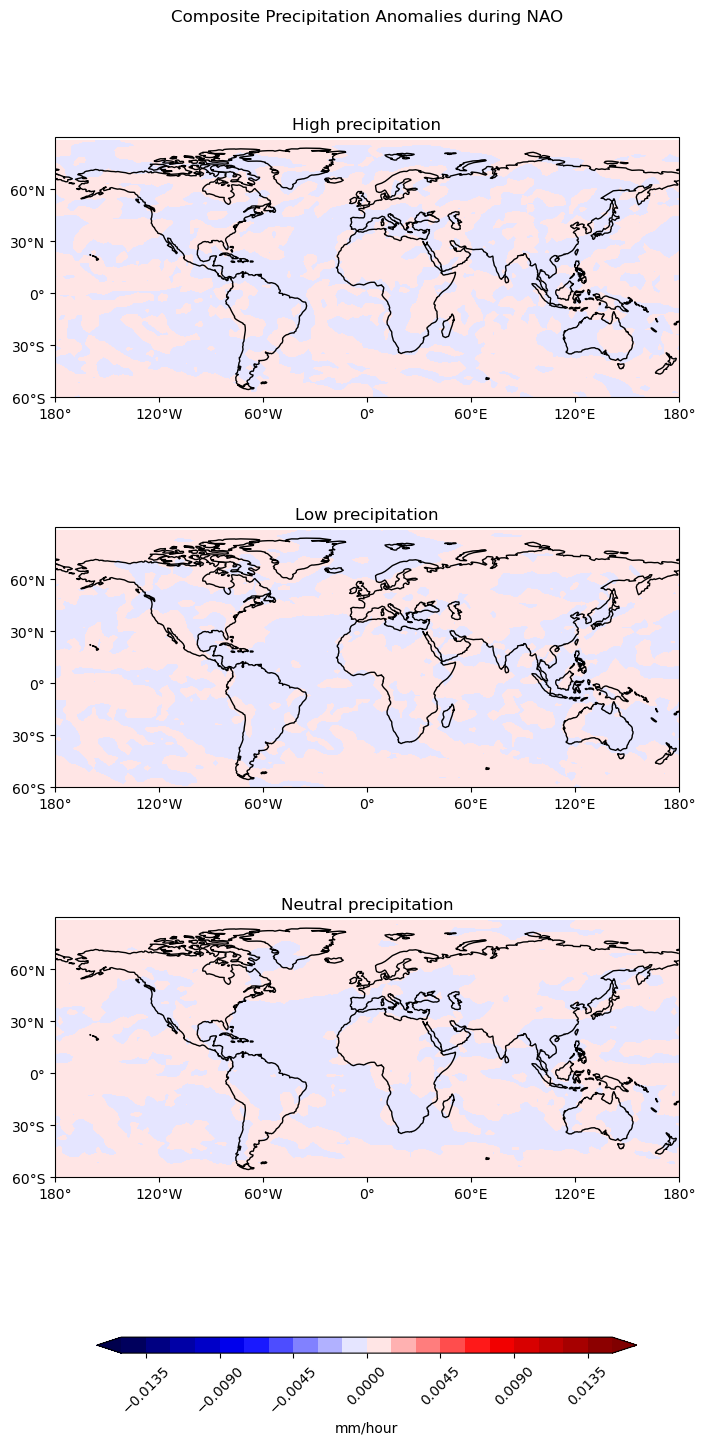

In [121]:
labels=['High precipitation','Low precipitation','Neutral precipitation']
clevs = np.linspace(-0.015, 0.015, 21)
comp_evap=[High_precipitation_overlap, Low_precipitation_overlap, Neutral_precipitation_overlap]

fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10.8,16))

axs = axs.flatten()

#Loop over all of the seasons and plot
for i, evap in enumerate(comp_evap):

        data = comp_evap[i]
        data,lons = add_cyclic_point(data,coord=comp_evap[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_evap[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='seismic',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,61,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        axs[i].set_title(labels[i])
        axs[i].coastlines()
        axs[i].set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
        
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.14, 0.5, 0.01]) # x-position, y-position, width, height
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/hour')
# Replace the values below with your actual precipitation statistics



plt.setp(cbar.ax.get_xticklabels(), rotation=45)
plt.suptitle('Composite Precipitation Anomalies during NAO') 